# 6/30 project 진행
---

## data load 및 data type convert

In [1]:
import pandas as pd

In [2]:
X = pd.read_csv(r'D:\ML_final_project\train.csv')
y = pd.read_csv(r'D:\ML_final_project\test.csv')

In [3]:
#str형에서 int형으로 변경
X['Sex'] = X['Sex'].replace(['male', 'female'], [0, 1])
y['Sex'] = y['Sex'].replace(['male', 'female'], [0, 1])

In [19]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


---
## data 분석하기 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

아래 circle_chart 함수는 원형그래프를 그려주는 함수이다.

In [24]:
def circle_chart(feature):
    f = X[feature].value_counts()
    f_size = f.size
    f_index = f.index
    survived = X[X['Survived'] == 1][feature].value_counts()
    dead = X[X['Survived'] == 0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(f, labels=f_index, autopct='%1.1f%%')
    plt.title(feature + ' percentage')
    plt.show()
    
    for i, idx in enumerate(f_index):
        plt.subplot(1, f_size + 1, i + 1, aspect='equal')
        plt.pie([survived[idx], dead[idx]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
        plt.title(str(idx) + ' percentage')
        
    plt.show()

원형그래프를 통해 분석할 수 있는 feature들을 나타내보았다.

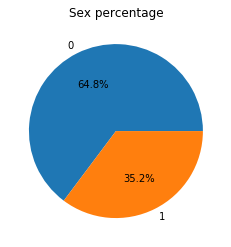

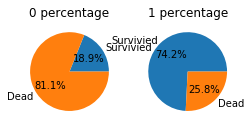

In [18]:
circle_chart('Sex')

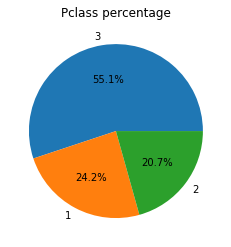

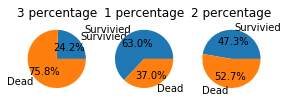

In [21]:
circle_chart('Pclass')

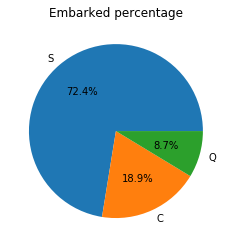

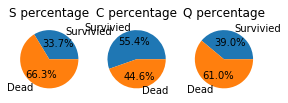

In [23]:
circle_chart('Embarked')

---

아래 함수는 막대그래프를 그려주는 함수이다.

In [25]:
def rod_chart(feature):
    survived = X[X['Survived']==1][feature].value_counts()
    dead = X[X['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

막대그래프를 통해 분석할 수 있는 feature들을 나타내보았다.

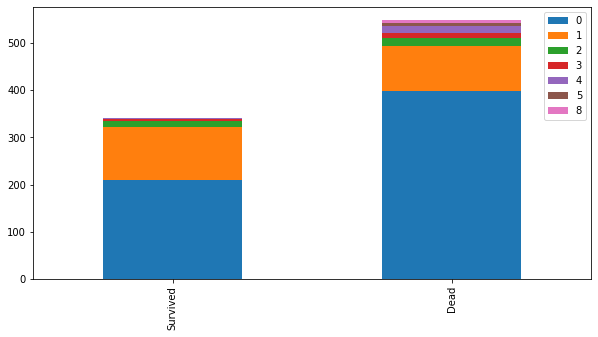

In [30]:
rod_chart('SibSp')

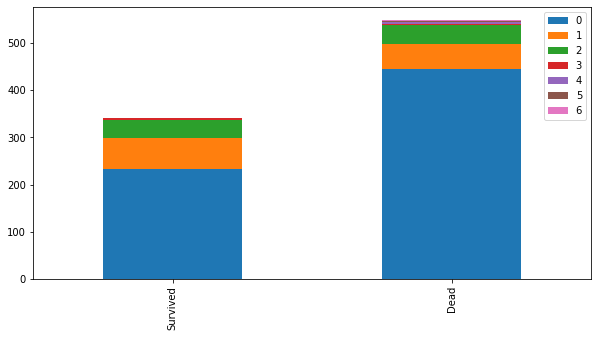

In [31]:
rod_chart('Parch')

이와 같이 각 feature 별로 생존과 사망의 비율에 대한 data 분석을 진행해보았다.